### 💾💻📊 Data Science - MMI Portfolio No. 2
# 💥 & Dimensionality Reduction for Visualization and Machine Learning 💥

An extremely common dataset for benchmarking, method development, and tutorials is **MNIST** consisting of handwritten digits. In reference to this dataset several variants appeared such as sign-MNIST (photos of hand gestures for sign language), audioMNIST (audiofiles of spoken digits) and **fashionMNIST** made of low resolution photos of 10 types of clothes. We will here use this tp explore different possibilities for using dimensionality reduction techniques.

Please complete the following exercises:
## 1. Data Visualization
- Use PCA to create a scatter plot of all 60,000 fashionMNIST images (in the training set)
- Use t-SNE and UMAP for the same purpose. Vary the respective key parameters (perplexity for t-SNE, n_neighbors, and -if you want- min_dist for UMAP).
- Give a short (say 1-2 paragraph) summary where you compare all three and explain which variant you prefer and why.
- Pick one variant and reduce to 3 (instead of 2) dimensions and plot the data again. You may also reduce the number of points if performance becomes an issue and you may use any visualization tool you like for this task. One possible option is `pyplot` (https://plotly.com/python/3d-scatter-plots/).


Hint: if t-SNE and/or UMAP are too slow, feel free to use PCA for an initial reduction of dimensions.


## 2. Machine Learning on top of PCA
In most cases, image classification is best done using deep learning techniques (such as CNNs).
However, for such simple images simpler techniques could work as well.
And, it is a good chance to learn how PCA can be used as a first step to reduce the complexity of a problem ;)

- Use PCA to reduce the number of dimensions until the PCA components cover 85 -90% of the variance (this can be done by setting `n_components` to a float value such as 0.85 or 0.9). 
- Check how much of the image information is preserved by doing an inverse transformation from PCa components back to an image using `.inverse_transform()`. It is sufficient to do this for a few example images.
- Use the reduced PCA vectors of all images ("pca_embeddings") to train two types of classification models: k-NN and RandomForest.
- Evaluate how good those models perform on the task of predicting the type of clothes.


## Libraries to use:
- PCA and t-SNE as well as the named machine learning models can all be found in `Scikit-Learn`.
- UMAP comes as another Python library (umap-learn), see also: https://umap-learn.readthedocs.io/en/latest/basic_usage.html
- Optional: Feel free to make use of the Scikit-Learn `Pipeline`.


## General instructions
- The final notebook should be executable in the correct order (this means it should work if you do `Kernel` --> `Restart kernel and run all cells...`)
- Just providing code and plots is not enough, you should document and comment where necessary. Not so much on small code-related things (you may still do this if you want though, but this is not required), but mostly to explain what you do, why you do it, what you observe.

More specifically:
- Please briefly comment on the changes you make to the data, in particular if you apply complex operations or if your changes depend on a certain choice you have to make.
- Please add descriptions and/or interpretations to the results you generate (for instance tables, plots). This doesn't have to be a lot of text. For simple, easy-to-understand results, a brief sentence can be enough. For more complex results, you might want to add a bit more explanation.

---
Please add your Name here
## Name: Kevin Zielke

---

## Imports and helper function
Use this part to import the main libraries used in this notebook.  
Also add more complex helper functions to this part (if you use any).

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# add imports if anything is missing
# for instance. feel free to use other plotting libraries (e.g. seaborn, plotly...)

## Data download and import
As mentioned above we here work with the **fashionMNIST** dataset. You can find download links to the data as well as additional information on the [fashion MNIST GitHub page](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file).


In [2]:
#!pip install idx2numpy

In [3]:
import idx2numpy

path_data = "..\\..\\datasets\\fashionMNIST"

file_train = os.path.join(path_data, "train-images-idx3-ubyte")
images_train = idx2numpy.convert_from_file(file_train)

file_test = os.path.join(path_data, "t10k-images-idx3-ubyte")
images_test = idx2numpy.convert_from_file(file_test)

In [4]:
# those tests should pass if you have the correct data
assert images_train.shape == (60000, 28, 28)
assert images_test.shape == (10000, 28, 28)

assert images_train[0].max() == 255
assert images_train[0].min() == 0

In [5]:
label_tags = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# Read from ubyte and convert to numpy array
file_train = os.path.join(path_data, "train-labels-idx1-ubyte")
labels_train = idx2numpy.convert_from_file(file_train)

file_test = os.path.join(path_data, "t10k-labels-idx1-ubyte")
labels_test = idx2numpy.convert_from_file(file_test)

# Convert to DataFrame
labels_train = pd.DataFrame([label_tags[x] for x in labels_train],
                            columns=["label"]
                           )
labels_test = pd.DataFrame([label_tags[x] for x in labels_test],
                            columns=["label"]
                           )

In [6]:
# those tests should pass if you have the correct data
assert labels_train.shape == (60000, 1)
assert labels_test.shape == (10000, 1)
assert np.all(labels_train.label.values[:5] == ['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top'])

## First Exploration 
Here some code to get a first impression of the data.

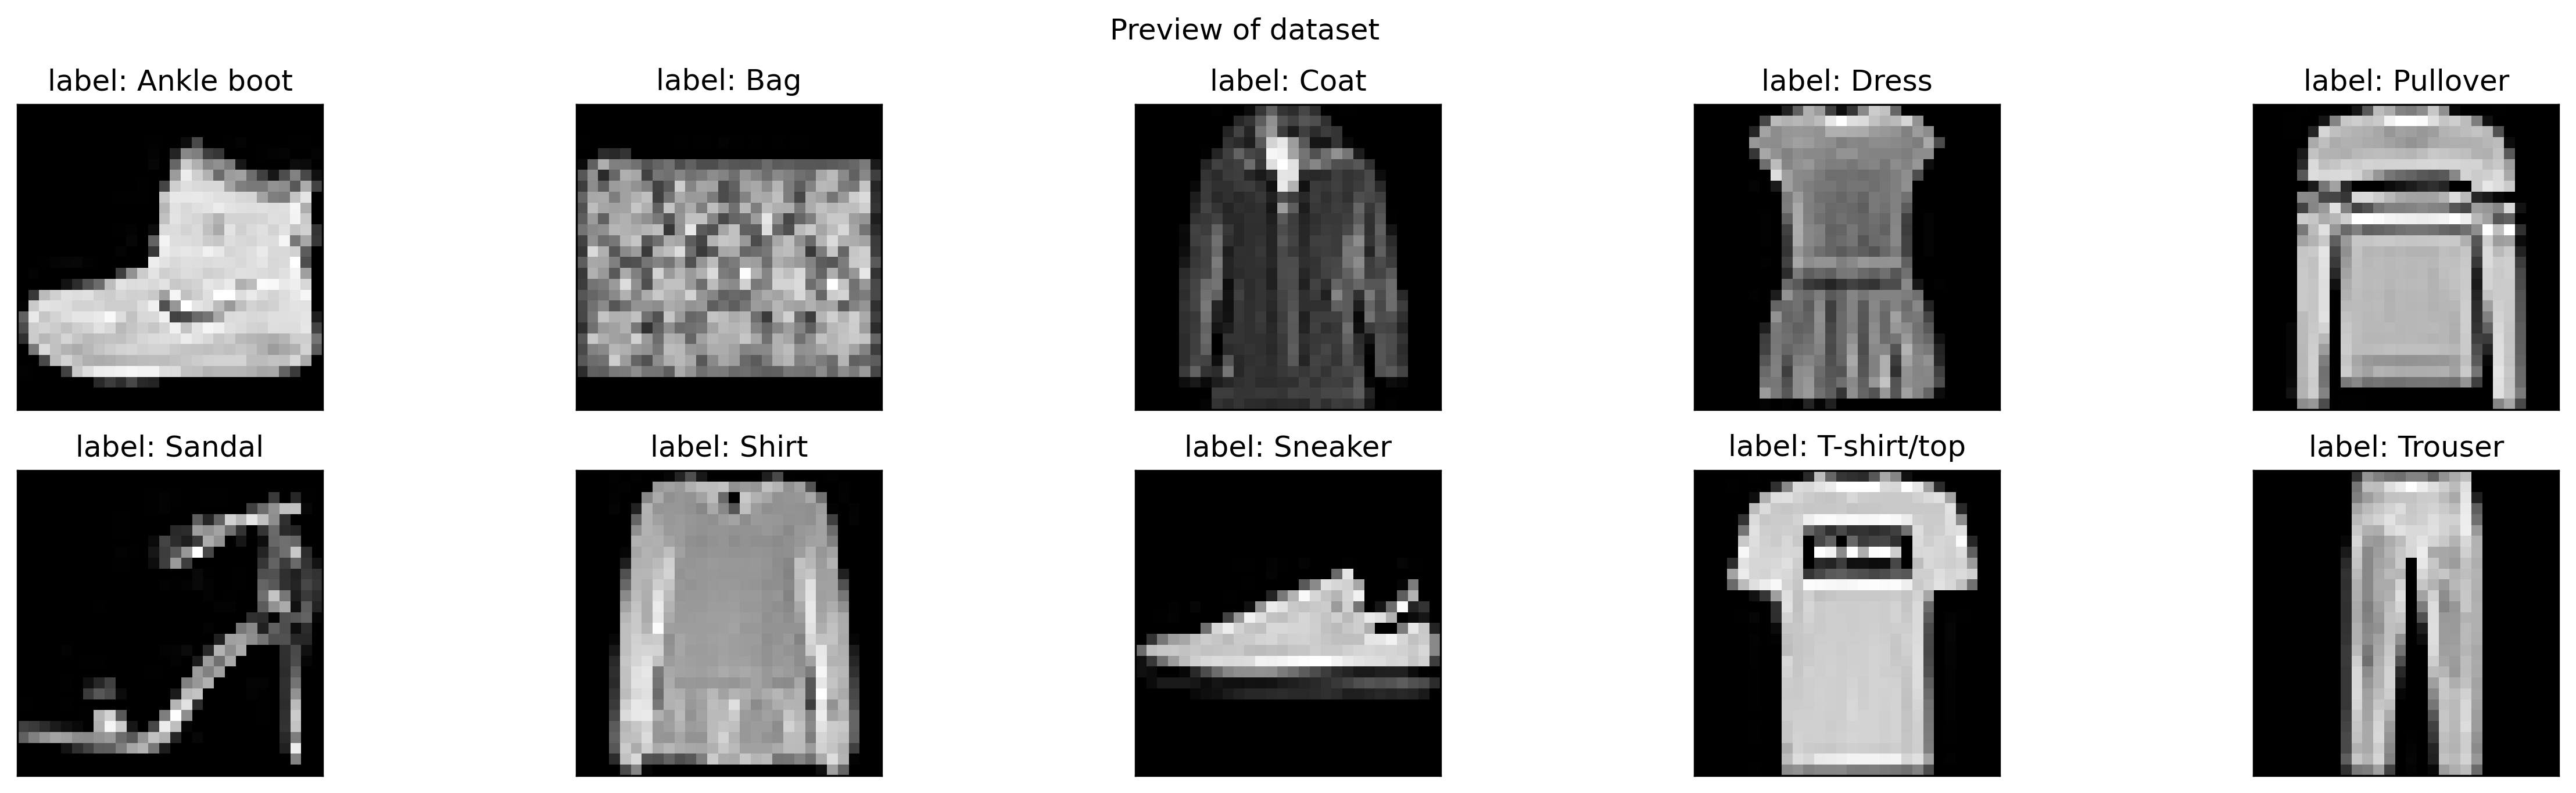

In [77]:
labels = np.unique(labels_train)

example_indices = []
example_labels = []

for label in labels:
    example_labels.append(label)
    example_indices.append(np.where(labels_train.label == label)[0][0])


# Plot example images
fig, axes = plt.subplots(2, 5, figsize=(20, 5), dpi=300)
fig.suptitle('Preview of dataset')

for i, ax in enumerate(axes.flat):
    index = example_indices[i]
    ax.imshow(images_train[index, :, :], cmap='gray')
    ax.set_title(f'label: {example_labels[i]}')
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.grid(False)  # Remove grid

plt.show()

## 1. Data Visualization
1. Use PCA to create a scatter plot of all 60,000 fashionMNIST images (in the training set)
2. Use t-SNE and UMAP for the same purpose. Vary the respective key parameters (perplexity for t-SNE, n_neighbors, and -if you want- min_dist for UMAP).
3. Give a short (say 1-2 paragraph) summary where you compare all three and explain which variant you prefer and why.
4. Pick one variant and reduce to 3 (instead of 2) dimensions and plot the data again. You may also reduce the number of points if performance becomes an issue and you may use any visualization tool you like for this task. One possible option is `pyplot` (https://plotly.com/python/3d-scatter-plots/).

### 1.1: PCA
Use PCA to create a scatter plot of all 60,000 fashionMNIST images (in the training set)

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

We have 60.000 monochromatic images in the training set. Each image is represented by an array of 28x28 float values between 0 and 255. These values represent the brightness of one pixel. Since these values are all the data, we dont need to standardize it.
We need to flatten the images to a one-dimensional array with 784 pixels for the PCA-method to work. This reduces the dimensions of the array, but the amount of data still stays the same. Finally PCA is applied to reduce the dimensionality to only 2 dimensions:

In [9]:
print(images_train.shape)

X_flat = images_train.reshape(images_train.shape[0], -1)
print(X_flat.shape)

# # Standardize the features
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X_flat)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)
X_pca.shape

(60000, 28, 28)
(60000, 784)


(60000, 2)

Now every image has an PCA-embedding of 2 dimensions. We can plot these embeddings in a scatter plot. To verify if this method was of any use, we will color the points by their class and see if the classes are somewhat separated. We use seaborns default color palette for this, because it is designed to be easily readable for catecorical data.

In [204]:
# encode labels for color coding using matplotlib
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
encoded_train_labels = labelencoder.fit_transform(labels_train.label)
decoded_train_labels = labelencoder.inverse_transform(range(len(labelencoder.classes_)))

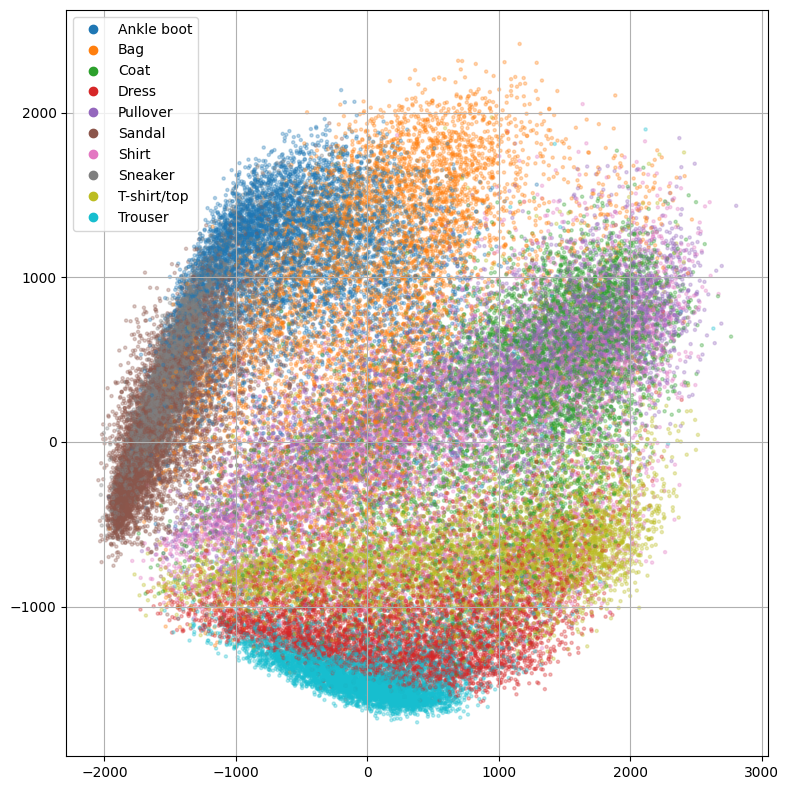

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                     alpha=0.3,                     # low alpha to see if there are overlapping points in the plot
                     s=5,                           # tiny points
                     c=encoded_train_labels,#[:subset],   # color scatter points by label
                     cmap='tab10')                  # tab10 has good readibility for categorical data
ax.grid(True)
plt.tight_layout()

# Add legend
legend_handles = scatter.legend_elements()[0]
for handle in legend_handles:
    handle.set_alpha(1)                              # high alpha for better readibility in the legend
ax.legend(legend_handles, decoded_train_labels)

plt.show()

### 1.2.1: t-SNE

Use t-SNE and UMAP for the same purpose. Vary the respective key parameters (perplexity for t-SNE, n_neighbors, and -if you want- min_dist for UMAP).

In [13]:
from sklearn.manifold import TSNE

In [14]:
# using a subset of the data during development
subset = 100

Loaded t-SNE-Data for perplexity=2
Loaded t-SNE-Data for perplexity=5
Loaded t-SNE-Data for perplexity=15
Loaded t-SNE-Data for perplexity=35
Loaded t-SNE-Data for perplexity=50


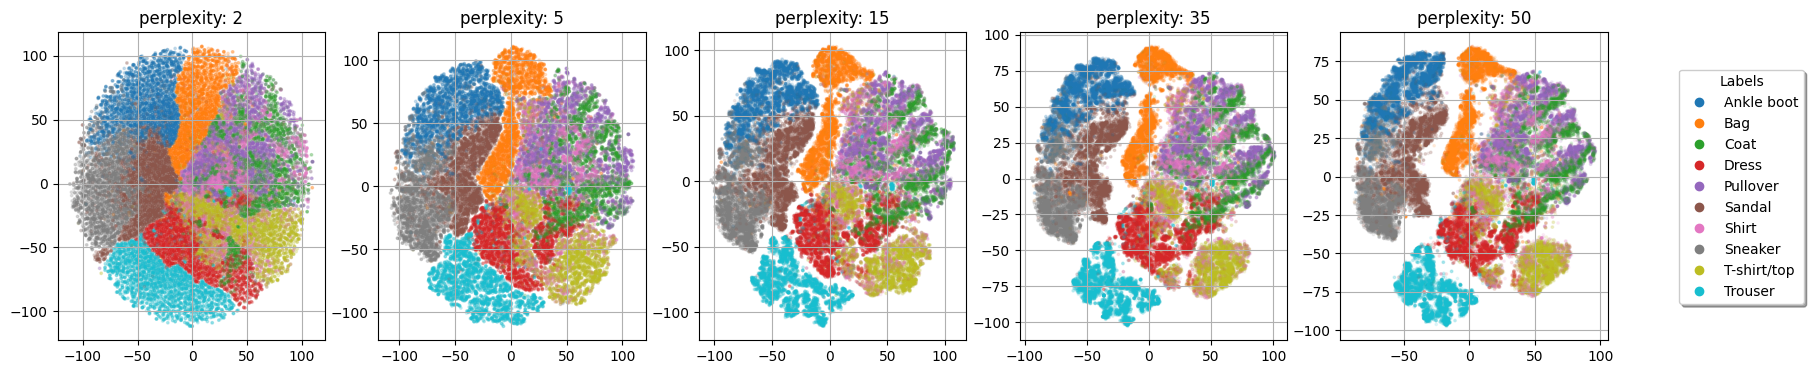

In [23]:
perplexities = [2, 5,  15, 35, 50]
fig, axs = plt.subplots(1, len(perplexities), figsize=(4*len(perplexities) ,4))

scatters = []
for i, perplexity in enumerate(perplexities):
    try:
        # load from csv if its already calculated
        X_tsne = pd.read_csv(os.path.join(path_data, "t-SNE - perplexity=" + str(perplexity) + ".csv")).values
        print(f"Loaded t-SNE-Data for perplexity={perplexity}")
    except:
        print(f"Found no t-SNE-Data for perplexity={perplexity}. Calculating...")
        # calculate t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, init='pca')
        X_tsne = tsne.fit_transform(X_flat)#[:subset])
        
        # persist as CSV
        filename = "t-SNE - perplexity=" + str(perplexity) + ".csv"
        pd.DataFrame(X_tsne).to_csv(os.path.join(path_data, filename), index=False)

    # create scatter plot
    scatter = axs[i].scatter(X_tsne[:, 0], X_tsne[:, 1],
                             alpha=0.1,                     # low alpha to see if there are overlapping points in the plot
                             s=3,                           # tiny points
                             c=encoded_train_labels,#[:subset],   # color scatter points by label
                             cmap='tab10')                  # tab10 has good readibility for categorical data
    scatters.append(scatter)
    axs[i].set_title(f"perplexity: {perplexity}")
    axs[i].grid(True)

# Add a legend
legend_handles = scatters[0].legend_elements()[0]
for handle in legend_handles:
    handle.set_alpha(1)                                     # high alpha for better readibility in the legend
legend = fig.legend(legend_handles, decoded_train_labels,
           title="Labels",
           loc='center right',
           fancybox=True, shadow=True)

plt.show()

### 1.2.2: UMAP

Use t-SNE and UMAP for the same purpose. Vary the respective key parameters (perplexity for t-SNE, n_neighbors, and -if you want- min_dist for UMAP).

In [16]:
# why has this package such cryptic importing and installation?
#conda install -c conda-forge umap-learn
import umap.umap_ as umap

Loaded UMAP-Data for n_neighbors=2
Loaded UMAP-Data for n_neighbors=5
Loaded UMAP-Data for n_neighbors=10
Loaded UMAP-Data for n_neighbors=25
Loaded UMAP-Data for n_neighbors=50


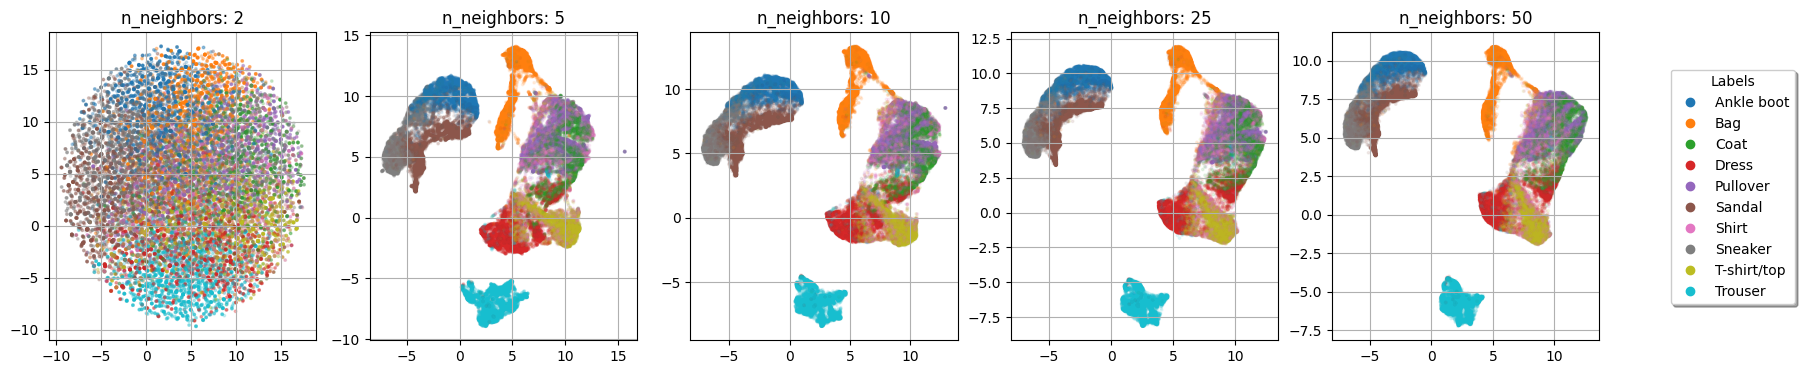

In [26]:
n_neighbors_values = [2, 5, 10, 25, 50]
fig, axs = plt.subplots(1, len(n_neighbors_values), figsize=(4 * len(n_neighbors_values), 4))

# Create a scatter plot for each subplot
for i, n_neighbors in enumerate(n_neighbors_values):
    try:
        # load from csv if its already calculated
        X_umap = pd.read_csv(os.path.join(path_data, "umap - n_neighbors=" + str(n_neighbors) + ".csv")).values
        print(f"Loaded UMAP-Data for n_neighbors={n_neighbors}")
    except:
        print(f"Found no UMAP-Data for n_neighbors={n_neighbors}. Calculating...")
        # calculate UMAP
        reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, init="pca")
        X_umap = reducer.fit_transform(X_flat)#[:subset])
        
        # persist as csv
        filename = "umap - n_neighbors=" + str(n_neighbors) + ".csv"
        pd.DataFrame(X_umap).to_csv(os.path.join(path_data, filename), index=False)

    # create scatter plot
    scatter = axs[i].scatter(X_umap[:, 0], X_umap[:, 1],
                             alpha=0.1,                     # low alpha to see if there are overlapping points in the plot
                             s=3,                           # tiny points
                             c=encoded_train_labels,#[:subset],   # color scatter points by label
                             cmap='tab10')                  # tab10 has good readibility for categorical data
    axs[i].set_title(f"n_neighbors: {n_neighbors}")
    axs[i].grid(True)

# Add a legend
legend_handles = scatters[0].legend_elements()[0]
for handle in legend_handles:
    handle.set_alpha(1)                                     # high alpha for better readibility in the legend
fig.legend(legend_handles, decoded_train_labels,
           title="Labels",
           loc='center right',
           fancybox=True, shadow=True)

plt.show()

### 1.3: Summary
- Give a short (say 1-2 paragraph) summary where you compare all three and explain which variant you prefer and why.

**PCA**: Using PCA we can see that the classes form clusters, but there is still a lot of overlap. Footwear in general forms a somewhat clear cluster, but Ankle boots, sneakers and sandals all overlap each other. Additionally they overlap a lot with bags. The trousers are also recognized and only overlap with the dress cluster. But all other classes, which are all upper body clothing overlap each other. PCA can cluster footwear, trousers and tops, which have clear differences in shape, but not the individual classes. This might be due to the fact that PCA is a linear method and the classes are not linearly separable.

**t-SNE**: I tried perplexities 2, 5, 15, 35 and 50. There is less overlapping of the classes for all perplexities than with PCA. Bags and trousers are recognized very clearly (but there is a little trouser island at coordinates 50:0). The footwear is also recognized clearly and has not much overlap to the other classes. There is still some overlap between ankle boots, sandal and sneakers, but for perplexities 15 and above it is already quite good compared to the other methods. The classes of upper body clothing are still overlapping a lot. Pullovers, dresses and T-shirts/tops are seperated quite clearly, but coats and shirts are sprinkled all over these clusters to. Interestingly the t-shirts/tops and dresses have one clear cluster each with perplexity 2, but both form 2 clusters in higher perplexities, cutting into each other. The higher perplexities show more room between the clusters which is good. Perplexities 15 and above don't show much difference in the clusters, except for a clearer separation of T-shirts/tops and shirts. _I would choose perplexity=35_ as the best value for this method. 50 doens't change much compared to 35.

**UMAP**: I tried values 2, 5, 10, 15 and 50 for n_neighbours for UMAP. While 2 n_neigbours has even more overlapping than PCA, the others look better but don't seem to change much. It has the same problems as t-SNE inside of the footwear and upper body clothing clusters, but there is alot more relative space between these and the bags and trousers clusters, seperating them more clearly. Even the T-shirts/tops cluster cutting into the dresses cluster is also visible in UMAP. _I would choose n\_neighbours=5_ for this method. The T-shirt/top and dress clusters look a bit better for the higher values, but there is some noisy part between bags and pullovers in n_neighbours=5 (around 7;10) that looks like it just gets sorted to the pullover cluster for the higher values. 

### 1.4: 3D Plot
- Pick one variant and reduce to 3 (instead of 2) dimensions and plot the data again. You may also reduce the number of points if performance becomes an issue and you may use any visualization tool you like for this task. One possible option is `pyplot` (https://plotly.com/python/3d-scatter-plots/).

I choose tsne with perplexity=35 for this task. 

In [64]:
try:
    # load from csv if its already calculated
    X_tsne = pd.read_csv(os.path.join(path_data, "t-SNE - n_components=3 - perplexity=35.csv")).values
    print(f"Loaded t-SNE-Data for n_components=3 and perplexity=35")
except:
    print(f"Found no t-SNE-Data for n_components=3 and perplexity=35. Calculating...")
    tsne3 = TSNE(n_components=3, perplexity=35, random_state=42, init='pca')
    X_tsne3 = tsne3.fit_transform(X_flat)#[:subset])
    # persist as CSV
    filename = "t-SNE - n_components=3 - perplexity=35.csv"
    pd.DataFrame(X_tsne).to_csv(os.path.join(path_data, filename), index=False)

X_tsne3.shape

Found no t-SNE-Data for n_components=3 and perplexity=35. Calculating...


(60000, 3)

In [69]:
import plotly.graph_objects as go

# create Tab10 colormap for plotly
cmap = plt.get_cmap("tab10")
tab10 = cmap(np.arange(cmap.N))
tab10 = tab10[:, :3]

# Assuming X_tsne3 is a numpy array
x = X_tsne3[:, 0]
y = X_tsne3[:, 1]
z = X_tsne3[:, 2]

fig = go.Figure()

# Add a trace for each unique label
for i in np.unique(encoded_train_labels):
    marker_dict=dict(size=2,
                    color='rgb'+str(tuple(tab10[i%10]*255)),        # use the Tab10 colors
                    opacity=1)
    scatter3d = go.Scatter3d(x=x[i == encoded_train_labels],#[:subset]],
                             y=y[i == encoded_train_labels],#[:subset]],
                             z=z[i == encoded_train_labels],#[:subset]],
                             mode='markers',
                             marker=marker_dict,
                             name=str(labelencoder.classes_[i]))    # use the label as the trace name
    fig.add_trace(scatter3d)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), legend= {'itemsizing': 'constant'})
fig.show()

## 2. Machine Learning on top of PCA
In most cases, image classification is best done using deep learning techniques (such as CNNs).
However, for such simple images simpler techniques could work as well.
And, it is a good chance to learn how PCA can be used as a first step to reduce the complexity of a problem ;)

1. Use PCA to reduce the number of dimensions until the PCA components cover 85 -90% of the variance (this can be done by setting `n_components` to a float value such as 0.85 or 0.9). 
2. Check how much of the image information is preserved by doing an inverse transformation from PCa components back to an image using `.inverse_transform()`. It is sufficient to do this for a few example images.
3. Use the reduced PCA vectors of all images ("pca_embeddings") to train two types of classification models: k-NN and RandomForest.
4. Evaluate how good those models perform on the task of predicting the type of clothes.

### 2.1: PCA
Use PCA to reduce the number of dimensions until the PCA components cover 85 -90% of the variance (this can be done by setting `n_components` to a float value such as 0.85 or 0.9). 

Before applying the PCA to all images we need to merge the test and train images. Than we need to flatten them again:

In [177]:
all_images = np.concatenate([images_train, images_test], axis=0)
print(all_images.shape)
all_images_flat = all_images.reshape(all_images.shape[0], -1)
print(all_images_flat.shape)

(70000, 28, 28)
(70000, 784)


The PCA components cover 87% of the variance by reducing the dimensionality to 56 components:

In [180]:
pca2 = PCA(n_components=0.87)
pca_embeddings = pca2.fit_transform(all_images_flat)
pca_embeddings.shape

(70000, 56)

We have to split the data again into train and test sets. We have to be careful here and split the data exactly where we merged it before. Otherwise we will mess up the indices of the train and test split and their labels, which are stored in a different array.

In [187]:
# split the pca_embeddings into train and test again
pca_embeddings_train = pca_embeddings[:images_train.shape[0], :]
pca_embeddings_test = pca_embeddings[images_train.shape[0]:, :]

### 2.2: Inverse transformation
Check how much of the image information is preserved by doing an inverse transformation from PCa components back to an image using `.inverse_transform()`. It is sufficient to do this for a few example images.

In [188]:
# inverse transform
inverse_transformed_flat_images = pca.inverse_transform(pca_embeddings_train)
inverse_transformed_flat_images.shape

(60000, 784)

In [189]:
# unflatten to original image size
inverse_transformed_images = inverse_transformed_flat_images.reshape(-1, 28, 28)
inverse_transformed_images.shape

(60000, 28, 28)

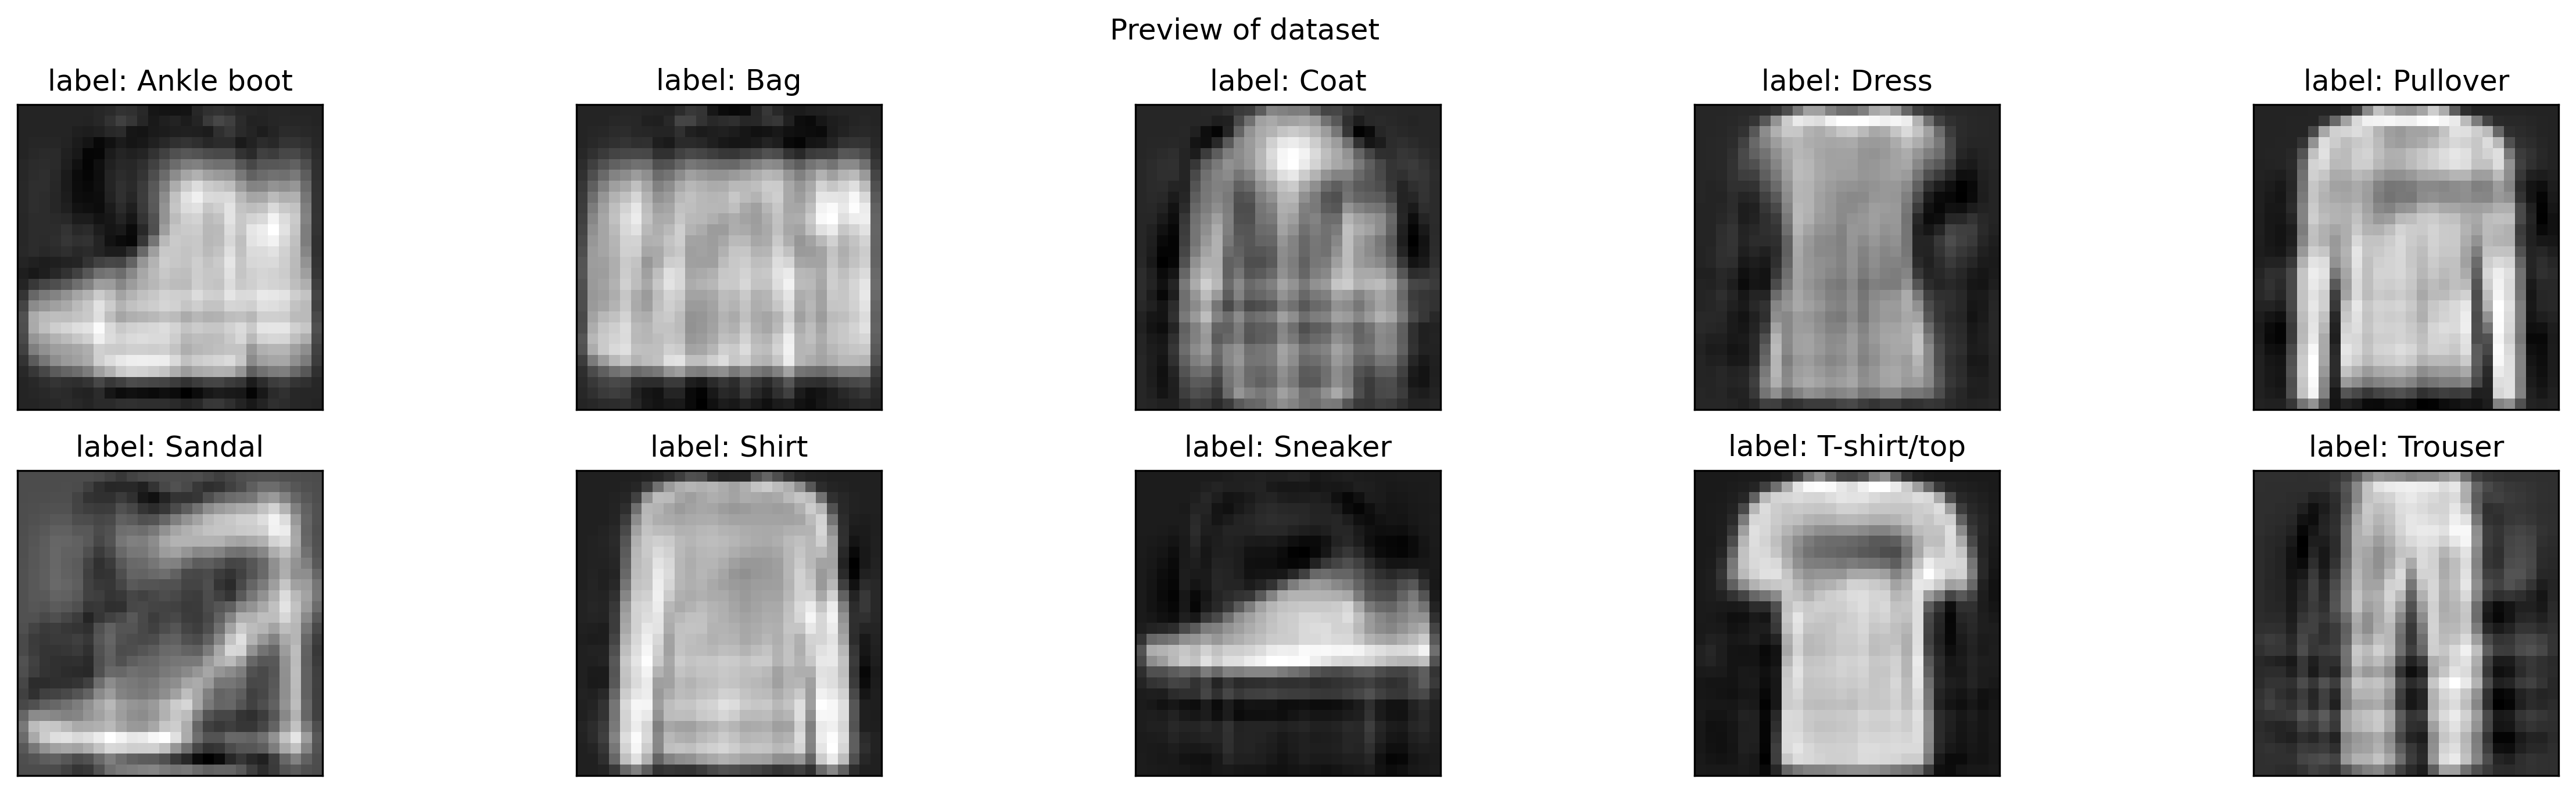

In [190]:
labels = np.unique(labels_train)

example_indices = []
example_labels = []

for label in labels:
    example_labels.append(label)
    example_indices.append(np.where(labels_train.label == label)[0][0])

# Plot example images
fig, axes = plt.subplots(2, 5, figsize=(20, 5), dpi=300)
fig.suptitle('Preview of dataset')

for i, ax in enumerate(axes.flat):
    index = example_indices[i]
    ax.imshow(inverse_transformed_images[index, :, :], cmap='gray')
    ax.set_title(f'label: {example_labels[i]}')
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.grid(False)  # Remove grid

plt.show()

### 2.3.1: Random Forest
Use the reduced PCA vectors of all images ("pca_embeddings") to train two types of classification models: k-NN and RandomForest.

#### 2.3.1.1: Grid Search
I will perform a grid search to find the best hyperparameters for the RandomForest model. I am using code I have written in a previous course.  
Grid search is a method to find the best hyperparameters for a model. It is done by training the model with different hyperparameters and evaluating its performance on the training data. The hyperparameters are chosen in a grid, where each combination of hyperparameters is tested.  
By doing multiple grid searches, a good set of hyperparameters can be narrowed down. The best combination is then chosen as the hyperparameters for the final model.

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def perform_and_plot_RNDForest_grid_search(parameters: dict, train_data, train_labels):
    model = RandomForestClassifier(random_state=42)
    
    grid_search = GridSearchCV(model, parameters, verbose=0)
    grid_search.fit(train_data, train_labels)
    
    # Collect grid search results
    cv_results = grid_search.cv_results_
    mean_test_scores = cv_results['mean_test_score']
    params = cv_results['params']

    # Prepare data for plotting
    scores_array = np.array(mean_test_scores).reshape(len(parameters['max_depth']),
                                                    len(parameters['min_samples_leaf']),
                                                    len(parameters['n_estimators']))

    # Create a line plot for each n_estimators
    fig, ax = plt.subplots(figsize=(10, 6))

    for k, n_estimators in enumerate(parameters['n_estimators']):
        scores_for_n_estimators = scores_array[:, :, k].T
        for i, min_samples_leaf in enumerate(parameters['min_samples_leaf']):
            ax.plot(parameters['max_depth'], scores_for_n_estimators[i],
                    marker='o', linestyle='--', label=f'n_estimators: {n_estimators}, min_samples_leaf: {min_samples_leaf}')

    ax.set_title('Grid Search Results')
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Mean Test Score')
    ax.legend(loc='best')

    plt.show()
    
    return grid_search

In [221]:
parameters = {"max_depth": [2, 10, 50, 100],
              "min_samples_leaf": [2, 10, 20],
              "n_estimators":[10, 50, 100, 500]}

grid_search = perform_and_plot_RNDForest_grid_search(parameters, pca_embeddings_train, encoded_train_labels)
print(grid_search.best_params_)

##### 2nd Grid Search

The parameters 'max_depth': 20, 'min_samples_leaf': 2 and 'n_estimators': 100 performed best in our grid search. It looks like 'min_samples_leaf' values higher than 2 are not giving better results. 'n_estimators' has better results with higher values, so we test even higher values than 100.
'max_depth' seems to be the most important parameter. It raised the mean test score for all tested models heavily going from 2 to 10. With a value of 20 it performed even better. We check for values 15, to make sure we don't miss a local maxima, and for 30 to see if the model is still improving:

#### 2.3.1.2: Training
The parameters 'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 200 performed even better, but not much. We can narrow down the parameters even more or look for completly different ones, but we might not make a big difference in mean test score. We will stick to the parameters we found in the last grid search.

In [ ]:
max_depth = grid_search.best_params_['max_depth']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']
n_estimators = grid_search.best_params_['n_estimators']

# train model
random_forest = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators, random_state=42)
random_forest.fit(pca_embeddings_train, encoded_train_labels)

KeyboardInterrupt: 

### 2.3.2: k-NN
Use the reduced PCA vectors of all images ("pca_embeddings") to train two types of classification models: k-NN and RandomForest.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

def perform_and_plot_KNN_grid_search(parameters: dict, train_data, train_labels):
        model = KNeighborsClassifier()

        grid_search = GridSearchCV(model, parameters, verbose=0)
        grid_search.fit(train_data, train_labels)

        # Collect grid search results
        cv_results = grid_search.cv_results_
        mean_test_scores = cv_results['mean_test_score']
        params = cv_results['params']

        # Prepare data for plotting
        scores_array = np.array(mean_test_scores).reshape(len(parameters['n_neighbors']))

        # Create a line plot for n_neighbors
        fig, ax = plt.subplots(figsize=(10, 6))

        ax.plot(parameters['n_neighbors'], scores_array,
                marker='o', linestyle='--', label='n_neighbors')

        ax.set_title('Grid Search Results')
        ax.set_xlabel('n_neighbors')
        ax.set_ylabel('Mean Test Score')
        ax.legend(loc='best')

        plt.show()

        return grid_search

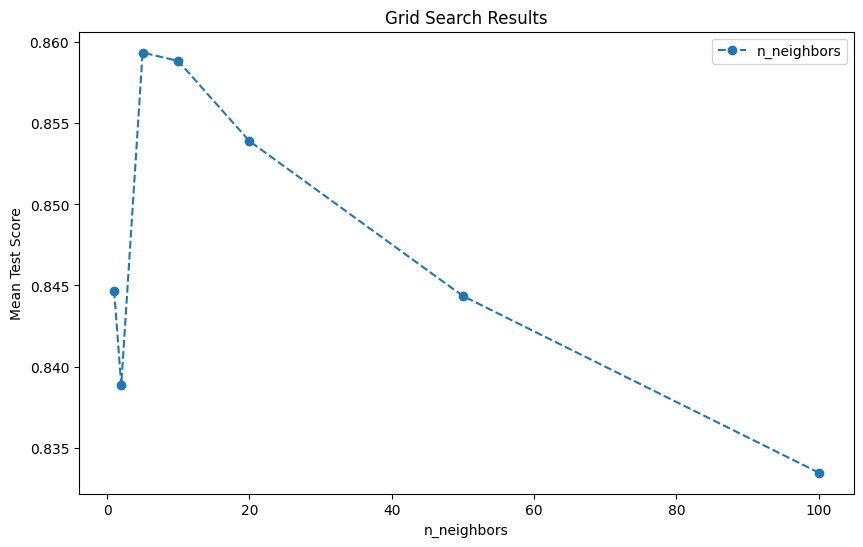

{'n_neighbors': 5}


In [ ]:
parameters = {"n_neighbors": [1, 2, 5, 10, 20, 50, 100]}

knn_grid_search = perform_and_plot_KNN_grid_search(parameters, pca_embeddings_train, encoded_train_labels)
print(knn_grid_search.best_params_)

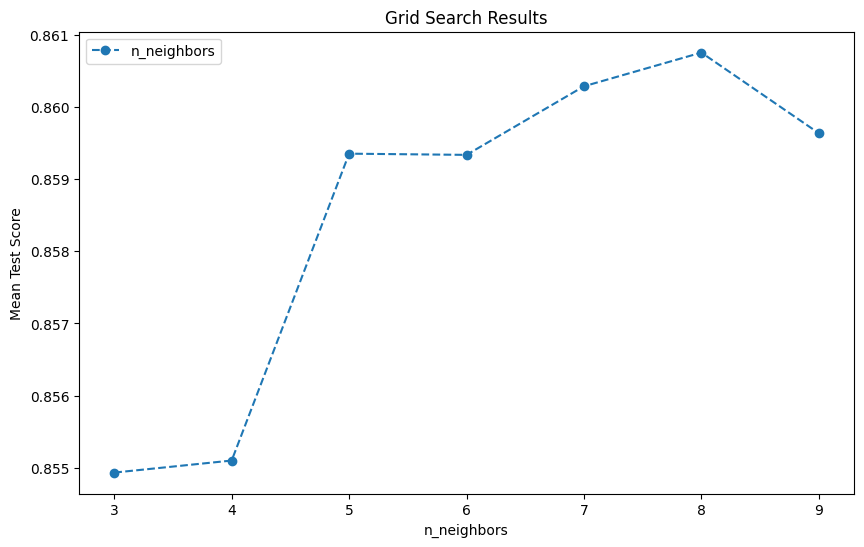

{'n_neighbors': 8}


In [ ]:
parameters = {"n_neighbors": [3, 4, 5, 6, 7, 8, 9]}

knn_grid_search = perform_and_plot_KNN_grid_search(parameters, pca_embeddings_train, encoded_train_labels)
print(knn_grid_search.best_params_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(pca_embeddings_train, encoded_train_labels)

KNeighborsClassifier(n_neighbors=8)

### 2.4: Evaluation
Evaluate how good those models perform on the task of predicting the type of clothes.

First we need to encode the test labels, like we encoded the train labels. For the train labels we used LabelEncoder.fit_transform(), but now we need to use LabelEncoder.transform() to use the same encoding for the test labels. Otherwise we would overwrite it with a new encoding.

In [ ]:
encoded_test_labels = labelencoder.transform(labels_test.label)
encoded_test_labels.shape

(10000,)

The next cell contains helper functions to print the C-Index, Baseline, Accuracy and f1-score, aswell as plotting the confusion matrix and the ROC curve.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, hamming_loss, confusion_matrix
import lifelines
import seaborn as sns

def plot_confusion_matrix(confusion_matrix):
    # Plot the confusion matrix using Seaborn's heatmap
    plt.figure(figsize=(10, 10), dpi=50)
    sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16},
               cmap="Purples",
               fmt="g")

    # Set labels and title
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title('Confusion Matrix', fontsize=20)

    # Show the plot
    plt.show()

def cindex(y_true, scores):
    return lifelines.utils.concordance_index(y_true, scores)

def evaluate_model(model, X_validation, y_validation):
    y_predicted = model.predict(X_validation)
    y_probability = model.predict_proba(X_validation)[:,1]
    
    print(f"C-Index         :  {cindex(y_validation, y_probability)}")
    
    stupid_predictions = np.random.randint(0, 10, len(y_validation))
    accuracy = metrics.accuracy_score(y_validation, stupid_predictions)
    print("Baseline        : ", accuracy)
    accuracy = metrics.accuracy_score(y_validation, y_predicted)
    print("Accuracy        : ", accuracy)
    
    print("Hamming Loss    : ", hamming_loss(y_validation, y_predicted))
    
    print("\nClassification Report:")
    print(classification_report(labelencoder.inverse_transform(y_validation), labelencoder.inverse_transform(y_predicted)))
    
    print("\nConfusion matrix: ")
    plot_confusion_matrix(confusion_matrix(labelencoder.inverse_transform(y_validation), labelencoder.inverse_transform(y_predicted)))

C-Index         :  0.4970169222222222
Baseline        :  0.0968
Accuracy        :  0.0984
f1 sore         :  0.0984
Hamming Loss    :  0.9016
Probability mean:  0.13535746176916952

Classification Report:
              precision    recall  f1-score   support

  Ankle boot       0.10      0.11      0.10      1000
         Bag       0.10      0.20      0.14      1000
        Coat       0.11      0.04      0.06      1000
       Dress       0.09      0.12      0.11      1000
    Pullover       0.10      0.12      0.11      1000
      Sandal       0.10      0.18      0.13      1000
       Shirt       0.08      0.04      0.05      1000
     Sneaker       0.15      0.01      0.03      1000
 T-shirt/top       0.09      0.11      0.10      1000
     Trouser       0.09      0.05      0.07      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.09     10000
weighted avg       0.10      0.10      0.09     10000


Confusion matrix: 


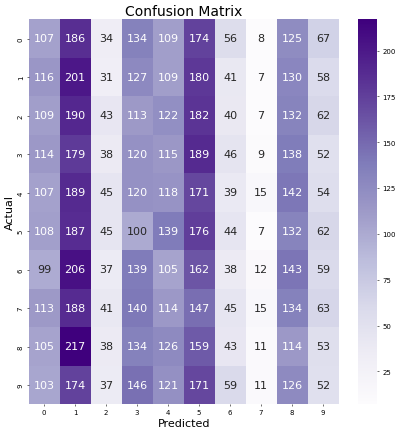

In [ ]:
evaluate_model(random_forest, pca_embeddings_test, encoded_test_labels)

C-Index         :  0.42495171111111113
Baseline        :  0.0996
Accuracy        :  0.8558
f1 sore         :  0.8558
Hamming Loss    :  0.1442
Probability mean:  0.100225

Classification Report:
              precision    recall  f1-score   support

  Ankle boot       0.90      0.97      0.93      1000
         Bag       0.95      0.97      0.96      1000
        Coat       0.73      0.81      0.77      1000
       Dress       0.90      0.88      0.89      1000
    Pullover       0.77      0.76      0.76      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.64      0.60      0.62      1000
     Sneaker       0.91      0.93      0.92      1000
 T-shirt/top       0.80      0.79      0.80      1000
     Trouser       0.99      0.96      0.98      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion matrix: 


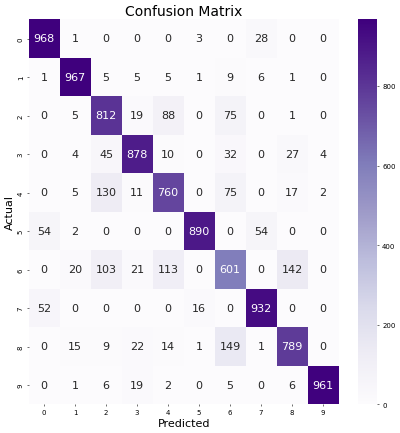

In [ ]:
evaluate_model(knn, pca_embeddings_test, encoded_test_labels)